<h1>Lab 2 - Pandas and Numpy</h1>
<h2>Part 1- Dataframes </h2>

In [163]:
#Import all libraries required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing as prepr
from pandas.api.types import is_numeric_dtype

#Import titanic data- passenger data and ticker prices.
pass_data = pd.read_csv("http://staff.city.ac.uk/~sbbk529/Teaching/Resources/INM430/passengerData.csv")
tick_data = pd.read_excel("http://staff.city.ac.uk/~sbbk529/Teaching/Resources/INM430/ticketPrices.xlsx")

In [16]:
#Merge the type dataframes together, when two columns have the same name,
#does not need to state the column name to merge on but- it is done for good practise.
passtick_prices = pass_data.merge(tick_data,on="TicketType")

In [17]:
#Get the name of the oldest customer.
print(pass_data[pass_data["Age"] == pass_data.Age.max()]["Name"].values)

['Barkworth, Mr. Algernon Henry Wilson']


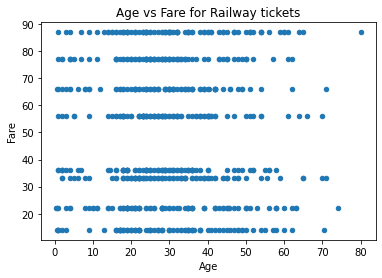

In [42]:
#Scatter plot data Age vs Fare
passtick_prices.plot(x="Age",y="Fare", kind="scatter")
plt.title("Age vs Fare for Railway tickets")
plt.show()

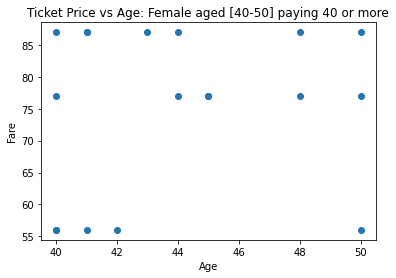

In [37]:
#Plot only the data that shows female passengers aged 40 to 50 and who paid more than or equal to 40.
tt_f40_to50 =  passtick_prices[(passtick_prices.Age >=40) & 
            (passtick_prices.Age<=50) &
            (passtick_prices.Sex == "female") & 
            (passtick_prices.Fare >=40)]
plt.scatter(data=tt_f40_to50,y="Fare", x="Age")
plt.ylabel("Fare")
plt.xlabel("Age")
plt.title("Ticket Price vs Age: Female aged [40-50] paying 40 or more")
plt.show()

<h2> Part 2- Missing Values </h2>
<p> I will be working with a dataset of prices and survivors from the RMS Titanic.
<br/>Dealing with missing values by filling them with mean and zeroes.</p>

In [20]:
#Load titanic dataset
titanic = pd.read_csv("http://staff.city.ac.uk/~sbbk529/Teaching/Resources/INM430/titanicSurvival_m.csv")
#count the number of null columns
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            46
Cabin          687
Embarked         2
dtype: int64

In [21]:
#compute the means and other statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,845.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.304319
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.792612
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
#create a new dataframe to fill NA values with 0
titanic_zero = titanic.copy() 

#Fill age and fare na values with 0 
titanic_zero[["Age","Fare"]] = titanic[["Age","Fare"]].fillna(0)
#Check if complete
titanic_zero.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

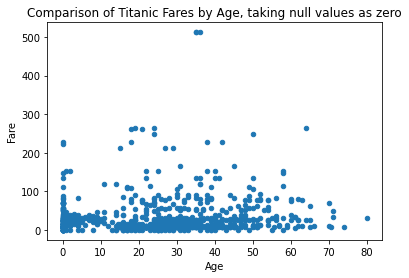

In [43]:
#Plot this
chart_zeroes = titanic_zero.plot(x="Age", y="Fare", kind="scatter",title="Comparison of Titanic Fares by Age, taking null values as zero")
plt.show()

In [24]:
#create a new dataframe where we will replace the NA values with the mean
titanic_mean = titanic.copy()
columns = ["Fare","Age"]

for i in columns:
    print(titanic[i].mean())

32.304318816568006
29.69911764705882


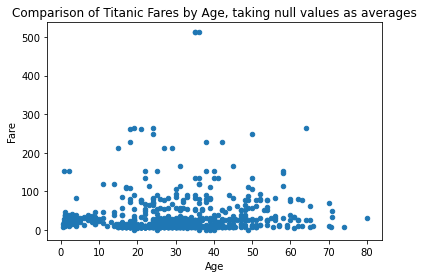

In [25]:
#replace the na values with the mean. 
for i in columns:
    titanic_mean[i] = titanic[i].fillna(titanic[i].mean())
chart_mean = titanic.plot(x="Age",y="Fare",kind="scatter", title="Comparison of Titanic Fares by Age, taking null values as averages")

<h2>Part 3- Data Transformations</h2>
<p>I will be using the World Health Organisation's Tuberculosis Data from 2014 to perform data transformations.</p>

In [55]:
#Get the csv file into a dataframe.
TB_data = pd.read_csv("http://staff.city.ac.uk/~sbbk529/Teaching/Resources/INM430/TB_burden_countries_2014-09-29.csv")

In [357]:
#Get the column name, -full title definitions
pd.set_option("display.max_colwidth",None)
data_def = pd.read_csv("https://extranet.who.int/tme/generateCSV.asp?ds=dictionary")
data_def.head() 
TB_data.columns
data_def.merge(pd.DataFrame(TB_data.columns, columns=["columns"]),left_on="variable_name", right_on="columns").head()

,variable_name,dataset,code_list,definition,columns
0,country,Country identification,NaN,Country or territory name,country
1,iso_numeric,Country identification,NaN,ISO numeric country/territory code,iso_numeric
2,iso2,Country identification,NaN,ISO 2-character country/territory code,iso2
3,iso3,Country identification,NaN,ISO 3-character country/territory code,iso3
4,c_cdr,Estimates,NaN,"Case detection rate (all forms) [also known as TB treatment coverage], percent",c_cdr


In [26]:
#Check how many null values there.
TB_data.isnull().sum()

country                        0
iso2                          23
iso3                           0
iso_numeric                    0
g_whoregion                    0
year                           0
e_pop_num                      0
e_prev_100k                   11
e_prev_100k_lo                11
e_prev_100k_hi                11
e_prev_num                    11
e_prev_num_lo                 11
e_prev_num_hi                 11
e_mort_exc_tbhiv_100k          1
e_mort_exc_tbhiv_100k_lo       1
e_mort_exc_tbhiv_100k_hi       1
e_mort_exc_tbhiv_num           1
e_mort_exc_tbhiv_num_lo        1
e_mort_exc_tbhiv_num_hi        1
source_mort                    1
e_inc_100k                     1
e_inc_100k_lo                  1
e_inc_100k_hi                  1
e_inc_num                      1
e_inc_num_lo                   1
e_inc_num_hi                   1
e_tbhiv_prct                1250
e_tbhiv_prct_lo             1446
e_tbhiv_prct_hi             1446
e_inc_tbhiv_100k            1306
e_inc_tbhi

<p><b>Filling Missing values</b><br/>As you can see above, we have null values in the dataset, which we will be trying to patch up. We are going to replace the null values by using interpolation and the nearest neighbour algorithm (K-NN Imputation)  and compare it with the original data. 
The trends will be compared and discussed below.</p>

In [425]:
#cloning the the interpol dataset
TB_interpol = TB_data.copy()
TB_knn = TB_data.copy()

In [426]:
### Interpolate missing values and set them in place.
countries = TB_interpol.country.unique()
for country in countries:
    mask = TB_interpol.loc[:,'country']== country
    TB_interpol[mask]= TB_interpol[mask].interpolate()

,iso_numeric,year,e_pop_num,e_prev_100k,e_prev_100k_lo,e_prev_100k_hi,e_prev_num,e_prev_num_lo,e_prev_num_hi,e_mort_exc_tbhiv_100k,...,e_tbhiv_prct_hi,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,c_cdr,c_cdr_lo,c_cdr_hi
count,4903.000000,4903.000000,4.903000e+03,4900.000000,4900.000000,4900.000000,4.900000e+03,4.900000e+03,4.900000e+03,4903.00000,...,3458.000000,3636.000000,3636.000000,3636.000000,3636.000000,3636.000000,3636.000000,4808.000000,4808.000000,4808.000000
mean,433.487457,2001.042219,2.899179e+07,207.429645,93.566061,377.646339,6.903631e+04,4.359243e+04,1.062963e+05,16.24537,...,11.541640,38.560017,30.852853,47.579389,5846.539486,4561.886484,7471.702279,67.659886,57.720639,83.018956
std,255.202944,6.643548,1.177827e+08,269.620312,137.951392,500.859089,3.301936e+05,2.727588e+05,4.149598e+05,23.91382,...,17.516528,118.718940,96.402995,145.170327,23063.311120,18791.190891,28827.191560,26.707511,23.849568,44.725054
min,4.000000,1990.000000,1.129000e+03,0.260000,0.080000,0.540000,0.000000e+00,0.000000e+00,1.000000e-02,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,212.000000,1995.000000,5.508830e+05,25.000000,10.000000,46.000000,3.900000e+02,1.600000e+02,7.775000e+02,1.40000,...,0.590000,0.180000,0.140000,0.230000,15.000000,12.000000,19.750000,50.000000,41.000000,64.000000
50%,430.000000,2001.000000,5.140332e+06,92.000000,37.000000,163.500000,4.600000e+03,1.900000e+03,8.100000e+03,5.40000,...,3.600000,2.000000,1.600000,2.500000,150.000000,110.000000,190.000000,75.000000,63.000000,93.000000
75%,646.000000,2007.000000,1.732282e+07,306.000000,129.000000,526.000000,3.000000e+04,1.300000e+04,5.300000e+04,22.00000,...,14.000000,15.000000,11.000000,18.000000,1500.000000,1200.000000,1800.000000,87.000000,77.000000,99.000000
max,894.000000,2012.000000,1.377065e+09,1860.000000,1316.000000,3565.000000,4.600000e+06,4.000000e+06,5.200000e+06,221.00000,...,88.000000,1151.000000,911.000000,1418.000000,330000.000000,270000.000000,390000.000000,340.000000,240.000000,1600.000000


In [427]:
#Use KNN Imputation 
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=20)

for col in TB_knn:
    if(is_numeric_dtype(TB_knn[col])):
        TB_knn[col] =  imputer.fit_transform(TB_knn[col].values.reshape(-1,1))

In [319]:
TB_data.dtypes.head(n=6)

country        object
iso2           object
iso3           object
iso_numeric     int64
g_whoregion    object
year            int64
dtype: object

In [59]:
#Grouping the data and getting description by country
TB_data.groupby("country").describe().head()

iso_numeric                                           year  \
                     count  mean  std   min   25%   50%   75%   max count   
country                                                                     
Afghanistan           23.0   4.0  0.0   4.0   4.0   4.0   4.0   4.0  23.0   
Albania               23.0   8.0  0.0   8.0   8.0   8.0   8.0   8.0  23.0   
Algeria               23.0  12.0  0.0  12.0  12.0  12.0  12.0  12.0  23.0   
American Samoa        23.0  16.0  0.0  16.0  16.0  16.0  16.0  16.0  23.0   
Andorra               23.0  20.0  0.0  20.0  20.0  20.0  20.0  20.0  23.0   

                        ... c_cdr_lo       c_cdr_hi                        \
                  mean  ...      75%   max    count       mean        std   
country                 ...                                                 
Afghanistan     2001.0  ...    43.75  77.0     18.0  48.188889  27.990879   
Albania         2001.0  ...    69.00  81.0     21.0  96.380952   3.612149   
Algeria         2001.0  ...    52.00  52.0     23.0  91.565217   1.471736   
American Samoa  2001.0  ...    66.00  76.0     21.0  91.809524  22.015038   
Andorra         2001.0  ...    77.00  77.0     22.0  99.000000   0.000000   

                                                 
                 min    25%   50%    75%    max  
country                                          
Afghanistan      4.4  31.25  53.5  62.75  120.0  
Albania         94.0  95.00  95.0  95.00  110.0  
Algeria         87.0  92.00  92.0  92.00   93.0  
American Samoa   0.0  93.00  93.0  99.00  110.0  
Andorra         99.0  99.00  99.0  99.00   99.0  

[5 rows x 264 columns]

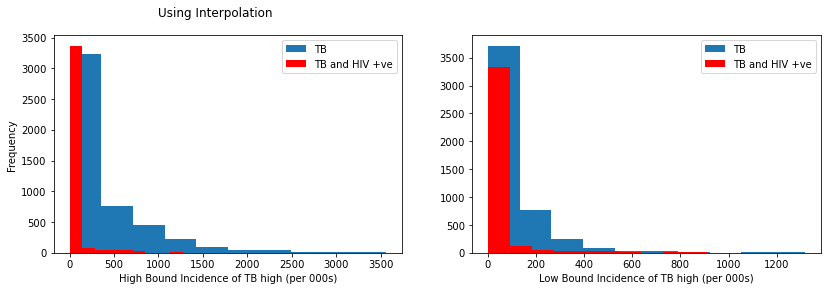

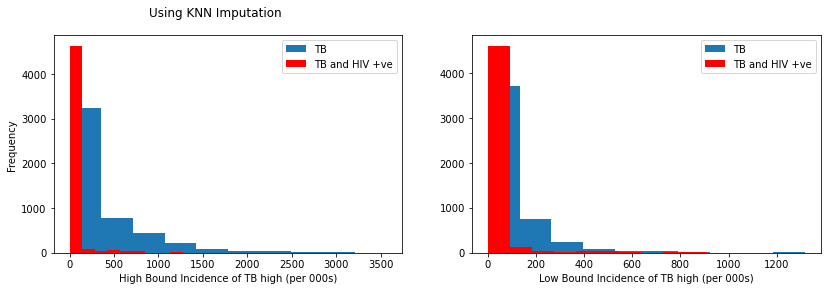

In [459]:
##Using Interpolation
#First subplot
fig1 = plt.figure()
sp = fig1.add_subplot(1,2,1)
sp.hist(TB_interpol.e_prev_100k_hi)
sp.hist(TB_interpol.e_inc_tbhiv_100k_hi, color="red")
sp.legend(["TB","TB and HIV +ve"])
sp.set_ylabel("Frequency")
sp.set_xlabel("High Bound Incidence of TB high (per 000s)")
fig1.subplots_adjust(right = 1.9)
#Second subplot
sp = fig1.add_subplot(1,2,2)
sp.hist(TB_interpol.e_prev_100k_lo)
sp.set_xlabel("Low Bound Incidence of TB high (per 000s)")
sp.hist(TB_interpol.e_inc_tbhiv_100k_lo, color="red")
sp.legend(["TB","TB and HIV +ve"])
fig1.suptitle("Using Interpolation",)
plt.show()

##Using KNN
#Third
fig2 = plt.figure()
sp = fig2.add_subplot(1,2,1)
sp.hist(TB_knn.e_prev_100k_hi)
sp.set_ylabel("Frequency")
sp.set_xlabel("High Bound Incidence of TB high (per 000s)")
sp.hist(TB_knn.e_inc_tbhiv_100k_hi, color="red")
sp.legend(["TB","TB and HIV +ve"])
fig2.subplots_adjust(right = 1.9)
#Fourth
sp = fig2.add_subplot(1,2,2)
sp.hist(TB_knn.e_prev_100k_lo)
sp.set_xlabel("Low Bound Incidence of TB high (per 000s)")
sp.hist(TB_knn.e_inc_tbhiv_100k_lo, color="red")
sp.legend(["TB","TB and HIV +ve"])
fig2.suptitle("Using KNN Imputation",horizontalalignment="center")
plt.show()

<p>The columns we are comparing in the figures shown above- the Low and High bound incidence of TB (per 1000) and also the Low and High bound incidence of TB who are also HIV positive (per 1000).<br/>It seems that from using both the fill methods, the missing data has been added to the left hand side of the graph, more specifically the groups between 0-200 in the low bound and 0-500 in the high bound incidence of TB. It also seems that from KNN Imputation that missing values seem to be added to 0-100 and 0-250 group, rather than the 100-200 and 250-500 groups for these four columns. I was expecting the nearest neighbor algorithm and interpolation to achieve similar results, but it seems to vary. This may be because interpolation did not fill all the datapoints and still had many null values whereas KNN Imputation filled in all the null values.</p>

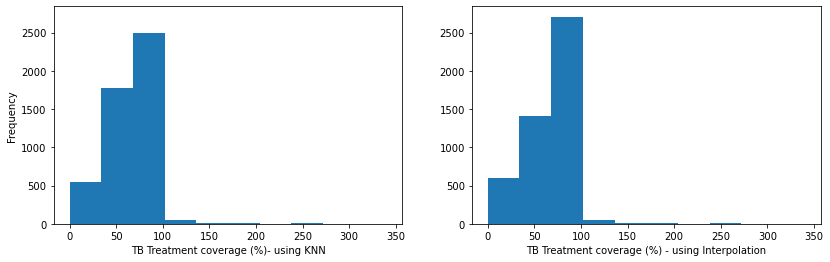

In [542]:
fig3 = plt.figure()
sp1 = fig3.add_subplot(121, ylabel="Frequency", xlabel="TB Treatment coverage (%)- using KNN")
sp1.hist(TB_knn.c_cdr)

fig3.subplots_adjust(right = 1.9)
sp2 = fig3.add_subplot(122,sharey=sp1,xlabel="TB Treatment coverage (%) - using Interpolation")
sp2.hist(TB_interpol.c_cdr)
plt.show()

D:\Programs\Anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Programs\Anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


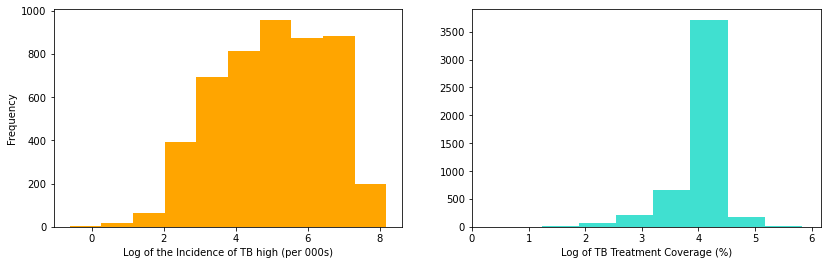

In [655]:
#Plotting the log values
fig4 = plt.figure()
sp = fig4.add_subplot(121)
sp.hist(TB_knn.apply(lambda x: np.log(x.e_prev_100k_hi),axis=1), color="orange")
sp.set_ylabel("Frequency")
sp.set_xlabel("Log of the Incidence of TB high (per 000s)")
fig4.subplots_adjust(right = 1.9)

sp = fig4.add_subplot(122,xlabel="Log of TB Treatment Coverage (%)")
#replace any zeroes
sp.hist((TB_knn.c_cdr.replace(0,np.NaN)).apply(lambda x: np.log(x)),color="turquoise")
sp.set_xlim(left=0)
plt.show()

<p>Above we can see the log gaphs of the incidence of TB and treatment coverage.</p>

<p><b>Mapping the columns</b><br/>We want to now map all the numeric columns into a [0,1] interval.<br/>
We can do this by using sklearns, built in function preprocessing.MinMaxScaler() which is:<br/> $
\large{\frac{x-\bar{x}}{x_{max}-x_{min}}}$<br/>
Where $x$ is a datapoint, $x_{max}$ and $x_{min}$ are maximum and minimum values, and $\bar{x}$ is the average of all the columns.</p>

In [617]:
#Using sklearn's prebuilt in function standard scaler to preprocess the data. 
from sklearn import preprocessing as prepr
from pandas.api.types import is_numeric_dtype

#Copy a new one, so we dont affect the data in the interpolated data.
TB_scaled = TB_interpol.copy()

#This only does it for a single column... so we need to do this for all of them.
scaler = prepr.MinMaxScaler(feature_range=(0,1))

for col in TB_scaled:
    #Check if columns are numeric
    if(is_numeric_dtype(TB_scaled[col])): #(TB_scaled[col].dtype == np.int64) or (TB_scaled[col].dtype == np.float64)): #The OLD school way
        TB_scaled[col] =scaler.fit_transform(TB_scaled[col].values.reshape(-1,1))

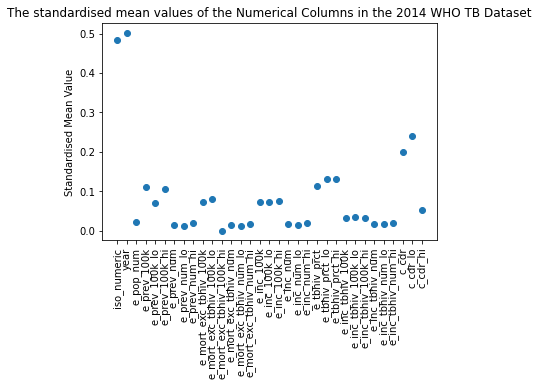

In [658]:
#get the means and plot them
import mplcursors
means = TB_scaled.describe()[1:2][:]
plt.scatter(y=means.loc["mean"],x=means.columns)
plt.ylabel("Standardised Mean Value")
plt.title("The standardised mean values of the Numerical Columns in the 2014 WHO TB Dataset")
plt.xticks(rotation=90)
plt.show()